In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
#Get the dataset of digits
digits = datasets.load_digits()
#Check the attributes of digits
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
#Print the shape of images in the digits dataset
print(digits.data.shape)
#Print the shape of target in the digits dataset
print(digits.target.shape)
print(digits.images.shape)

(1797, 64)
(1797,)
(1797, 8, 8)


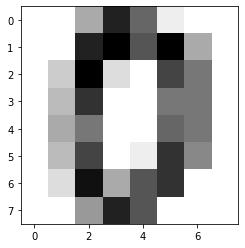

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [4]:
#Plot an image from the digits dataset
plt.imshow(digits.images[0],cmap='binary')
plt.show()
print(digits.data[0])

In [5]:
#Get data targets
y = pd.get_dummies(digits.target)
print(y.shape)
#Get data inputs - Flatten the images
image_vector_size = 8*8
X = digits.images.reshape(digits.images.shape[0], image_vector_size)
print(X.shape)

(1797, 10)
(1797, 64)


In [6]:
#Dataset splitting
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

In [7]:
#Helper functions
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

def softmax(x):
    exp = np.exp(x)
    sum = (np.sum(exp, axis=1))
    return (exp.T / sum).T

In [8]:
#He initialization
def initializeParameterHe(inputSize, hiddenLayerSize, outputSize):
    W1 = np.random.randn(hiddenLayerSize, inputSize) * np.sqrt(2/inputSize)
    W2 = np.random.randn(outputSize, hiddenLayerSize) * np.sqrt(2/hiddenLayerSize)
    b1 = np.zeros((hiddenLayerSize, 1))
    b2 = np.zeros((outputSize, 1))
    
    print(W1.shape)
    print(W2.shape)
    print(b1.shape)
    print(b2.shape)
    
    parameters = {"W1": W1, "W2": W2, "b1": b1, "b2": b2}
    return parameters

In [9]:
hiddenLayerSize = 15
inputSize = X_train.shape[1]
outputSize = y_train.shape[1]

parameters = initializeParameterHe(inputSize, hiddenLayerSize, outputSize)

(15, 64)
(10, 15)
(15, 1)
(10, 1)


In [10]:
#Forward propagation
def forwardPass(x, y, parameters):
    W1, W2, b1, b2 = parameters["W1"], parameters["W2"], parameters["b1"], parameters["b2"]
    
    print(parameters["W1"].shape)
    print(x.T.shape)
    
    Z1 = np.dot(W1, x.T) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)
    
    cache = {"Z1": Z1, "A1": A1, "W1": W1, "b1": b1, "Z2": Z2, "A2": A2, "W2": W2, "b2": b2}
    logprobs = np.multiply(np.log(A2), y.T) + np.multiply(np.log(1-A2), 1-y.T)
    cost = (-1/y.shape[1])*np.sum(logprobs)
    
    return cost, cache, A2

In [11]:
#Backward propagation
def backwardPass(x, y, cache):
    m = x.shape[1]
    Z1, A1, W1, b1, Z2, A2, W2, b2 = cache["Z1"], cache["A1"], cache["W1"], cache["b1"], cache["Z2"], cache["A2"], cache["W2"], cache["b2"]

    dZ2 = A2 - y.T
    dW2 = np.dot(dZ2, A1.T)/m
    db2 = np.sum(dZ2, axis=1)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, A1*(1-A1))
    dW1 = np.dot(dZ1, x)/m
    db1 = np.sum(dZ1, axis=1)/m
    
    gradients = {"dZ2": dZ2, "dW2": dW2, "db2": db2, "dZ1": dZ1, "dW1": dW1, "db1": db1}
    return gradients

In [12]:
#Update parameters
def udpateParameters(parameters, gradients, learningRate):
    parameters["W1"] = parameters["W1"] + learningRate * gradients["dW1"]
    parameters["b1"] = parameters["b1"] + learningRate * gradients["db1"]
    parameters["W2"] = parameters["W2"] + learningRate * gradients["dW2"]
    #parameters["b2"] = parameters["b2"] + learningRate * gradients["db2"]
    return parameters

In [13]:
epochs = 100000
learningRate = 0.01
losses = np.zeros((epochs, 1), dtype=object)

for i in range(epochs):
    losses[i, 0], cache, A2 = forwardPass(X_train, y_train, parameters)
    gradients = backwardPass(X_train, y_train, cache)
    parameters = udpateParameters(parameters, gradients, learningRate)

(15, 64)
(64, 1437)
(15, 64)
(64, 1437)


ValueError: operands could not be broadcast together with shapes (15,1437) (15,15) 